# Scalar data visualization in two dimensions

Para datos bidimensionales, es común asociar las dimensiones de los datos con la dimensión en pantalla.

Algunas opciones para la visualización escalar son:

- Imagen;
- Superficie deformada; y
- Isocontornos.

En general, recomiendo Matplotlib para visualizaciones 2D.

In [4]:
%matplotlib widget

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv

In [6]:
plt.style.use("../img/matplotlib.mplstyle")
pv.set_jupyter_backend('trame')

In [7]:
## Datos de prueba: Matlab `peaks()`
def peaks(xmin=-3, xmax=3, ymin=-3, ymax=3, nx=100, ny=100):
    x, y = np.mgrid[-3:3:50j,-3:3:50j]
    z =  3*(1 - x)**2 * np.exp(-x**2 - (y + 1)**2) \
       - 10*(x/5 - x**3 - y**5)*np.exp(-x**2 - y**2) \
       - 1./3*np.exp(-(x + 1)**2 - y**2)
    return x, y, z

In [8]:
x, y, z = peaks()

## Preguntas:

1. Considerando el rango de valores, ¿cuál sería un mapa de colores adecuado para este conjunto de datos?
2. ¿Qué representación se adapta mejor a los datos?

## Representación de imágenes

Hay varias opciones para esta representación, aunque no son completamente equivalentes.

Son:

- ``imshow``: El origen está en la esquina superior izquierda. No permite pasar arreglos adicionales para las coordenadas.
- ``pcolor``: El origen está en la esquina inferior izquierda. No permite pasar arreglos adicionales para las coordenadas.
- ``pcolormesh``: El origen está en la esquina inferior izquierda. No permite pasar arreglos adicionales para las coordenadas. La principal diferencia es la velocidad.

En caso de duda, utilice ``pcolormesh``.

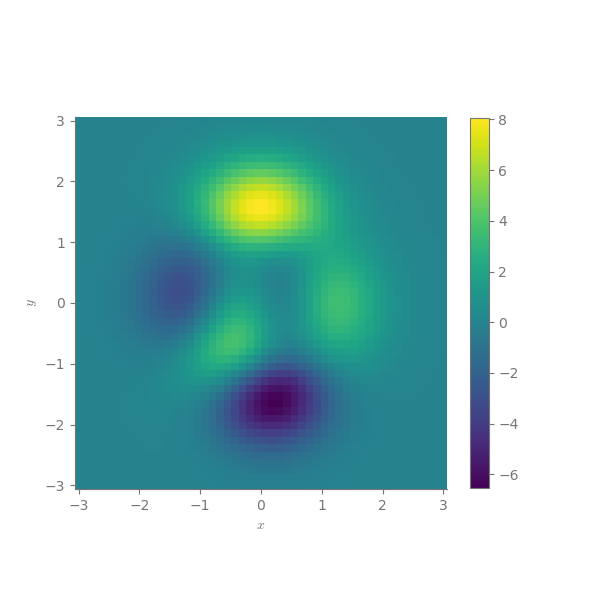

In [9]:
plt.figure(figsize=(6, 6))
plt.pcolormesh(x, y, z)
plt.colorbar(shrink=0.8)
plt.axis("image")
plt.xlabel("$x$")
plt.ylabel("$y$");

## Superficie deformada

Matplotlib ofrece una opción de proyección 3D para la creación de ejes. Esto permite crear
escenas 3D, como las requeridas para superficies deformadas. No funciona tan bien como en
las visualizaciones 2D, pero es útil si no necesitamos transparencia ni varias superficies
en la escena.

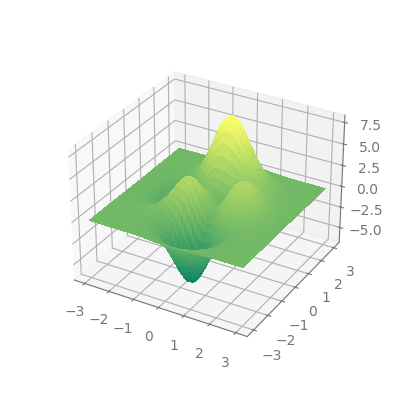

In [10]:
# Usando matplotlib
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1, linewidth=0,
                antialiased=False, cmap="summer")

plt.show()

In [25]:
# Usando PyVista
grid = pv.StructuredGrid(x, y, z)
grid["z"] = z.flatten()
grid.plot(smooth_shading=True, cmap="viridis", show_grid=True)

Widget(value='<iframe src="http://localhost:55865/index.html?ui=P_0x232a3164410_9&reconnect=auto" class="pyvis…

## Isocontornos


Hay dos opciones de contornos en Matplotlib:

- ``contour``: Crea las líneas de valor constante (isolíneas).
- ``contourf``: Rellena el espacio entre las isolíneas con color.

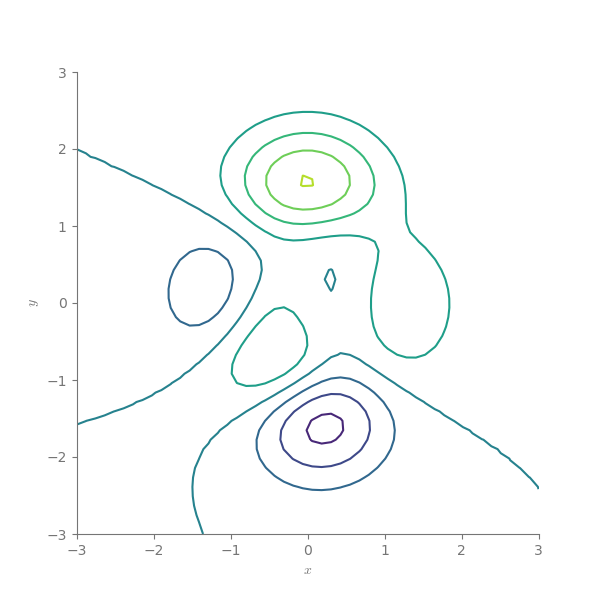

In [28]:
# Contornos
plt.figure(figsize=(6, 6))
plt.contour(x, y, z)
plt.axis("image")
plt.xlabel("$x$")
plt.ylabel("$y$");

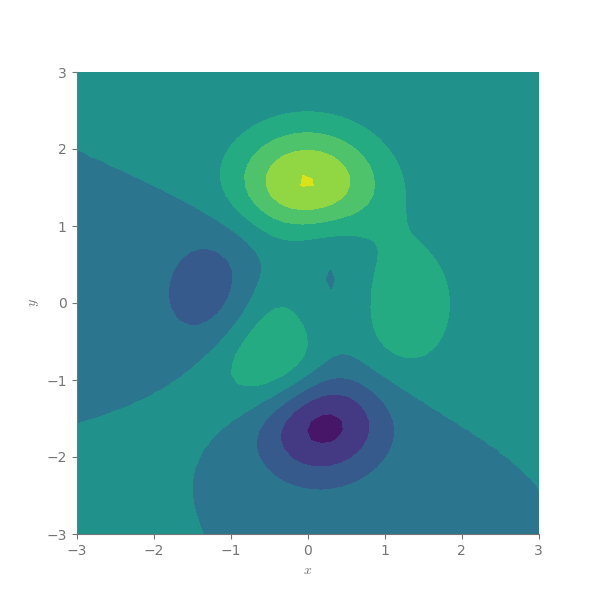

In [27]:
# Contornos rellenos
plt.figure(figsize=(6, 6))
plt.contourf(x, y, z)
plt.axis("image")
plt.xlabel("$x$")
plt.ylabel("$y$");

También podemos combinar la visualización de superficies deformadas con isocontornos.

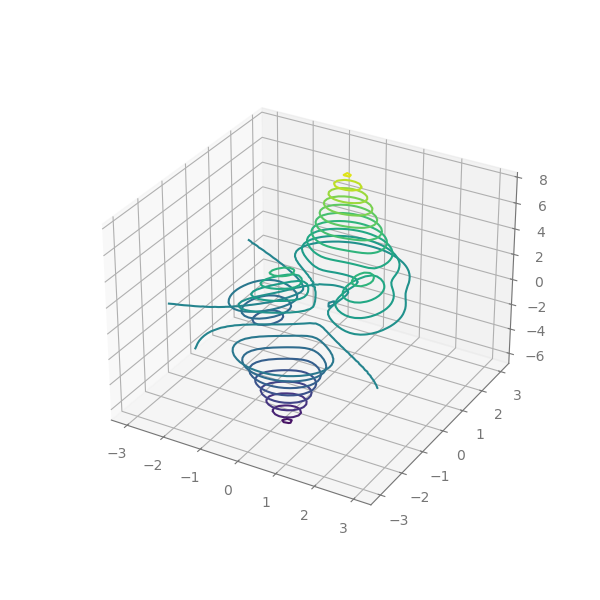

In [29]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')
ax.contour(x, y, z, 20);

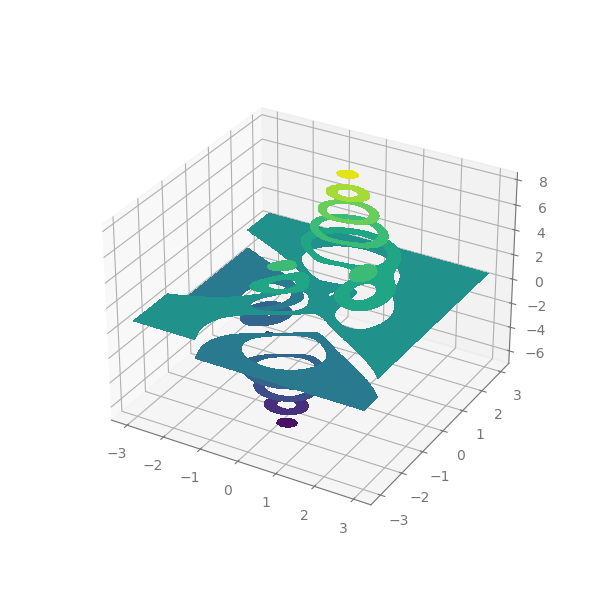

In [35]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')
ax.contourf(x, y, z, 10);

## Ejercicio

Visualice los datos del archivo `../data/2d_exercise.npy`. Puede cargarlo usando:

    data = np.load("../data/2d_exercise.npy")

Descomente la siguiente línea para ver la solución del ejercicio.

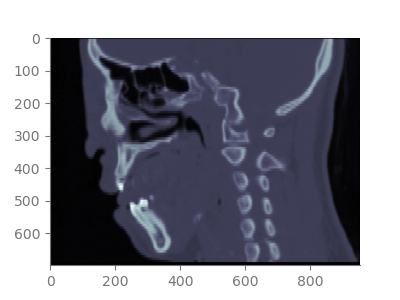

In [38]:
# %load ./snippets/2d_scalar_vis.py